In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy
from scipy import stats
import squarify as sq
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("../data/rock_music.csv")
dataset

,name,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
0,Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
3,Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
5364,Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
5365,Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0
5366,Vitamin C - 2004 Remastered Version,CAN,1972,3.57,52,0.643,0.006690,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853,0


In [3]:
rows, columns = dataset.shape
print(f'Редици: {rows}\nКолони: {columns}')

Редици: 5368
Колони: 17


In [4]:
dataset.describe(include='all').loc['unique', :]

name                5210
artist              1737
release_date         NaN
duration             NaN
popularity           NaN
danceability         NaN
acousticness         NaN
energy               NaN
instrumentalness     NaN
key                  NaN
liveness             NaN
loudness             NaN
speechiness          NaN
tempo                NaN
time_signature       NaN
valence              NaN
hit                  NaN
Name: unique, dtype: object

In [5]:
numerical_features = ['release_date', 'duration', 'popularity', 'danceability', 
                    'acousticness', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
                    'speechiness', 'tempo', 'time_signature', 'valence']
categorical_features = ['name', 'artist']

&nbsp;

Дескриптивни статистики

In [6]:
dataset.describe()

,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000
mean,1990.853577,4.152176,49.839046,0.510634,0.171710,0.716414,0.076063,5.200075,0.202884,-7.996721,0.057937,125.415947,3.948212,0.556065,0.486773
std,15.166924,1.500447,16.920373,0.147807,0.241492,0.204759,0.195643,3.489640,0.176925,3.529099,0.047116,28.362423,0.284237,0.241515,0.499872
min,1956.000000,0.970000,0.000000,0.061700,0.000001,0.003830,0.000000,0.000000,0.012000,-32.909000,0.022800,58.686000,1.000000,0.023800,0.000000
25%,1978.000000,3.300000,40.000000,0.413000,0.003640,0.586000,0.000003,2.000000,0.091400,-10.079500,0.032800,104.498750,4.000000,0.366000,0.000000
50%,1992.000000,3.950000,52.000000,0.515000,0.047000,0.758000,0.000273,5.000000,0.132000,-7.383500,0.042100,124.006000,4.000000,0.561000,0.000000
75%,2003.000000,4.680000,62.000000,0.610000,0.257250,0.886000,0.016925,9.000000,0.269000,-5.292750,0.062925,142.884750,4.000000,0.749250,1.000000
max,2020.000000,24.090000,84.000000,0.987000,0.995000,0.998000,0.993000,11.000000,0.999000,1.949000,0.550000,217.913000,5.000000,0.990000,1.000000


In [7]:
dataset.describe(include='object')

,name,artist
count,5368,5368
unique,5210,1737
top,Home,The Beatles
freq,4,84


&nbsp;

Missing values

In [8]:
dataset.isna().sum()

name                0
artist              0
release_date        0
duration            0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
hit                 0
dtype: int64

&nbsp;

## Outliers

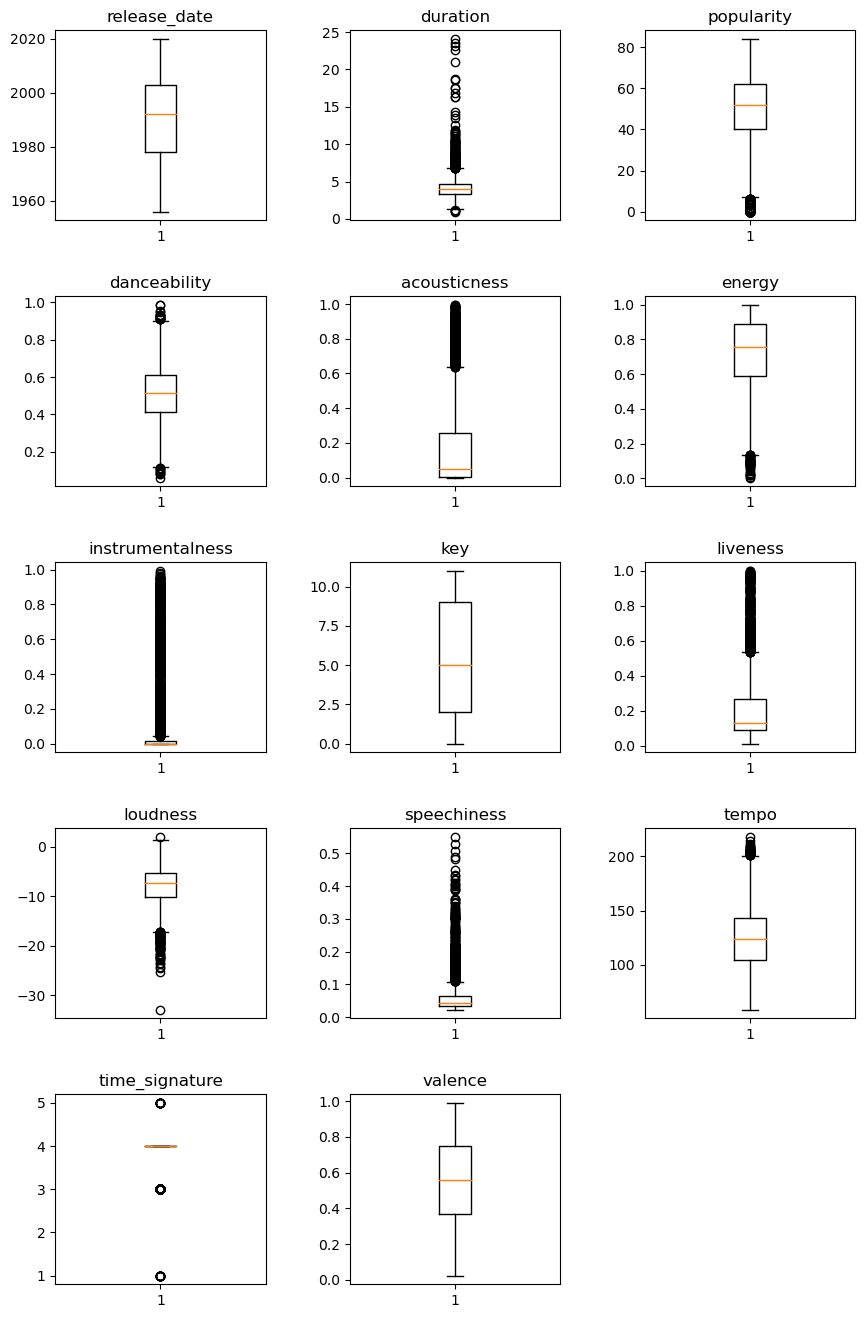

In [9]:
plt.figure(figsize=(10,19))
for i in range(1,len(numerical_features)+1):
    ax=plt.subplot(6, 3, i)
    ax.boxplot(dataset[numerical_features[i-1]])
    ax.set_title(numerical_features[i-1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

1. Го пресметуваме првиот и третиот квартил (Q1 и Q3)
2. Го пресметуваме интерквартилниот опсег, IQR = Q3 - Q1 
3. Ја пресметуваме долната граница, долна граница = Q1 * 1.5
4. Ја пресметуваме горната граница, горна граница = Q3 * 1.5
5. Ги заменуваме податочните точки што лежат надвор од долната и горната граница со NULL вредност

In [10]:
for x in numerical_features:
    q75,q25 = np.percentile(dataset.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dataset.loc[dataset[x] < min,x] = np.nan
    dataset.loc[dataset[x] > max,x] = np.nan

Збир на NULL вредности (missing values)

In [11]:
dataset.isnull().sum()

name                   0
artist                 0
release_date           0
duration             221
popularity           130
danceability          28
acousticness         443
energy                43
instrumentalness    1063
key                    0
liveness             325
loudness              73
speechiness          485
tempo                 35
time_signature       272
valence                0
hit                    0
dtype: int64

In [12]:
dataset = dataset.dropna(axis = 0)

In [13]:
dataset.isnull().sum()

name                0
artist              0
release_date        0
duration            0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
valence             0
hit                 0
dtype: int64

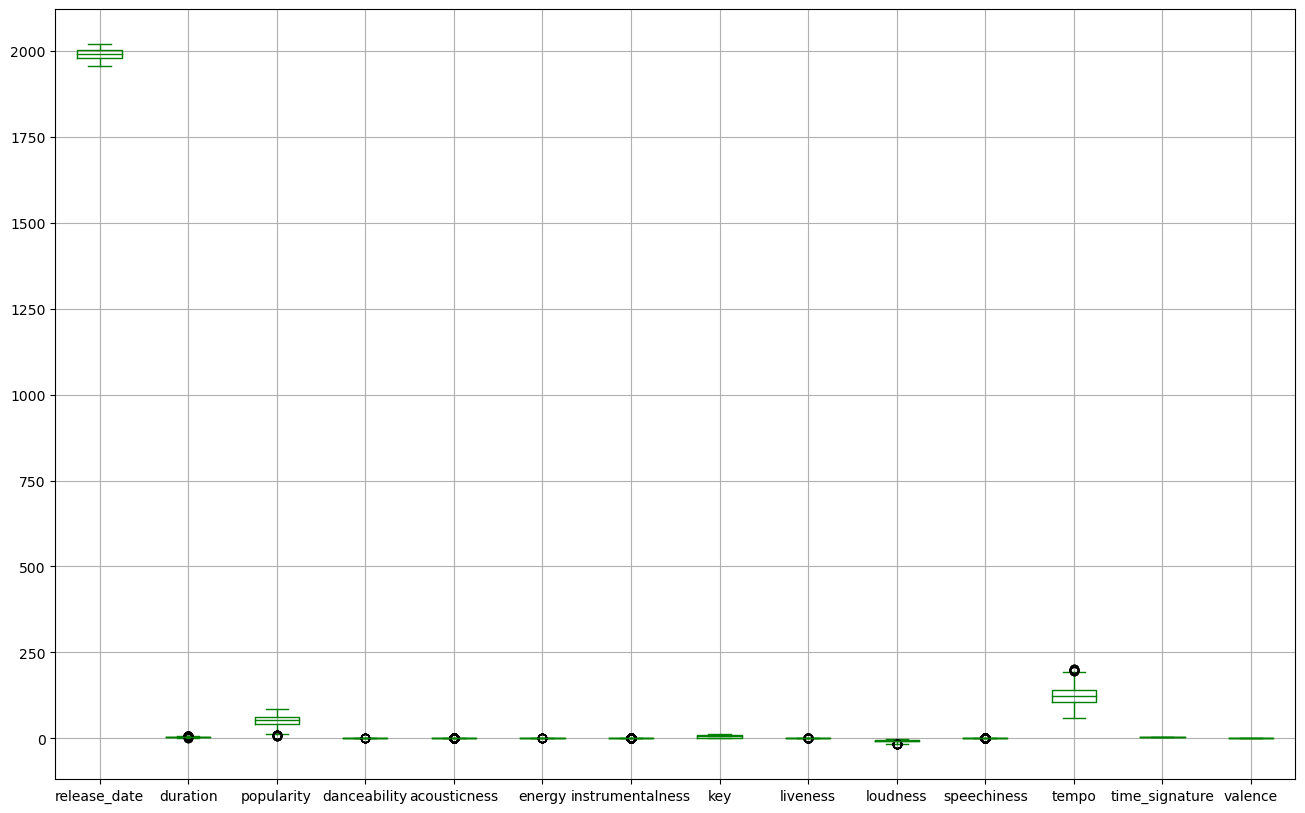

In [14]:
plt.figure(figsize=(16,10))
dataset[numerical_features].boxplot(color='green')
plt.show()

In [15]:
rows, columns = dataset.shape
print(f'Редици: {rows}\nКолони: {columns}')

Редици: 3051
Колони: 17


&nbsp;

## Визуелизации

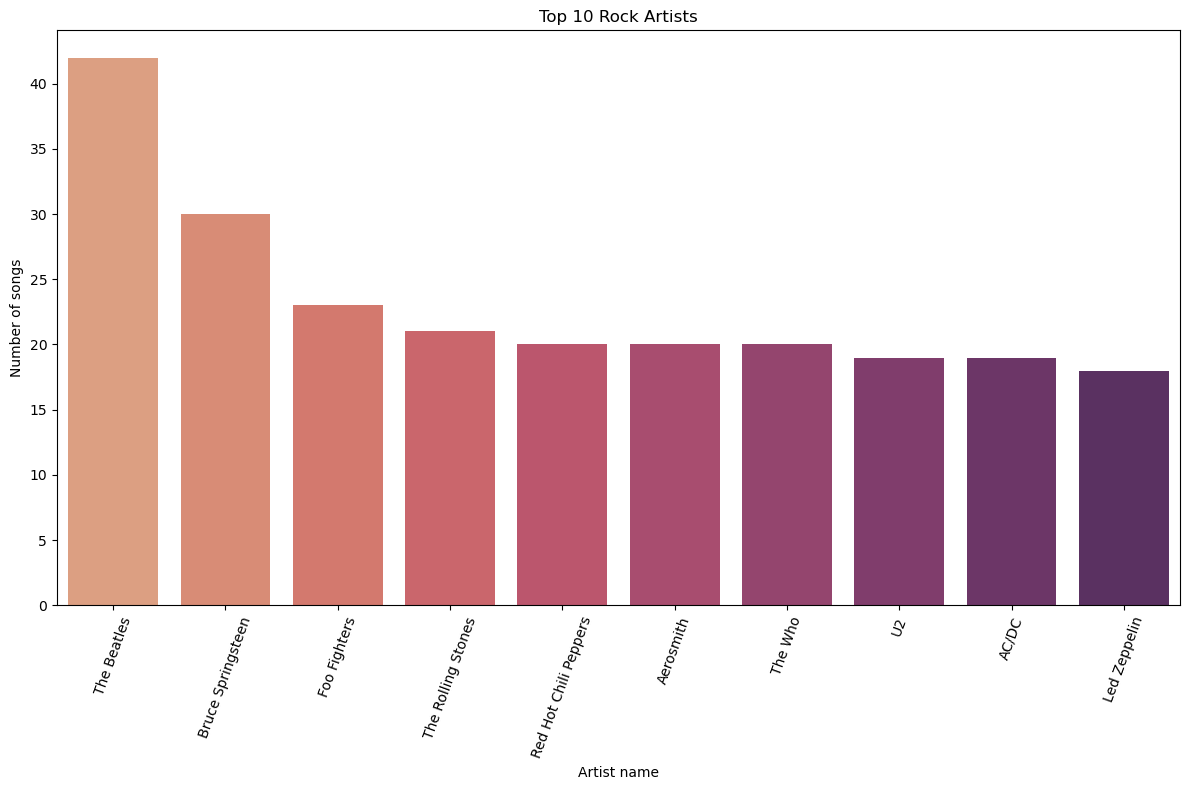

In [16]:
plt.figure(figsize = (12,8))
artist = dataset['artist'].value_counts()[:10]
sns.barplot(x=artist.index, y=artist, palette="flare")
plt.xticks(rotation=70)
plt.xlabel('Artist name')
plt.ylabel('Number of songs')
plt.title('Top 10 Rock Artists')
plt.tight_layout()

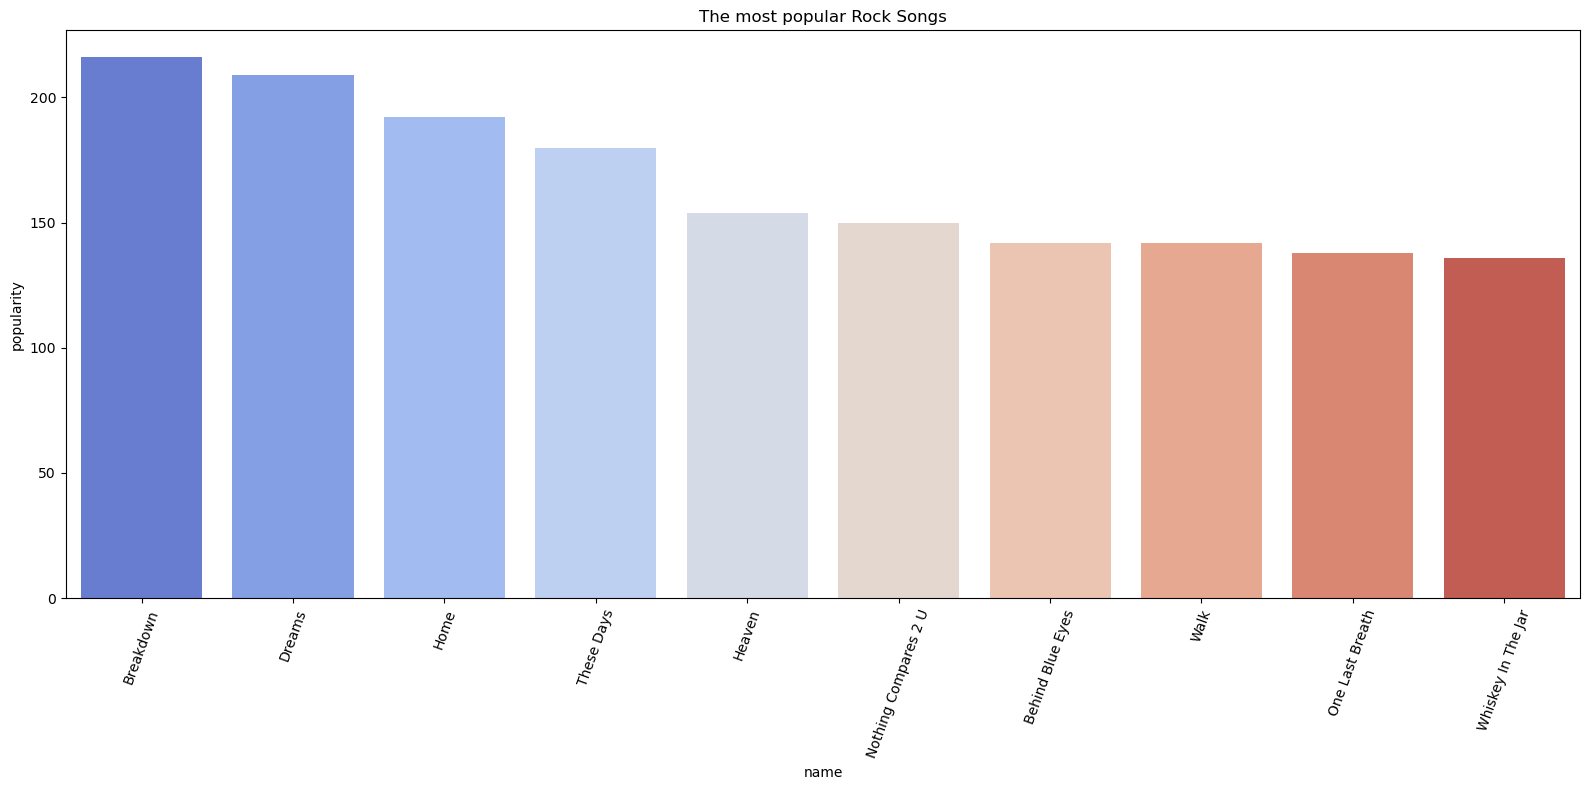

In [17]:
plt.figure(figsize = (16,8))
songs_grouped = dataset.groupby('name')['popularity'].sum().sort_values(ascending=False).head(10)
chart = sns.barplot(x=songs_grouped.index, y=songs_grouped, palette= 'coolwarm')
plt.xticks(rotation=70)
plt.title('The most popular Rock Songs')
plt.tight_layout() 

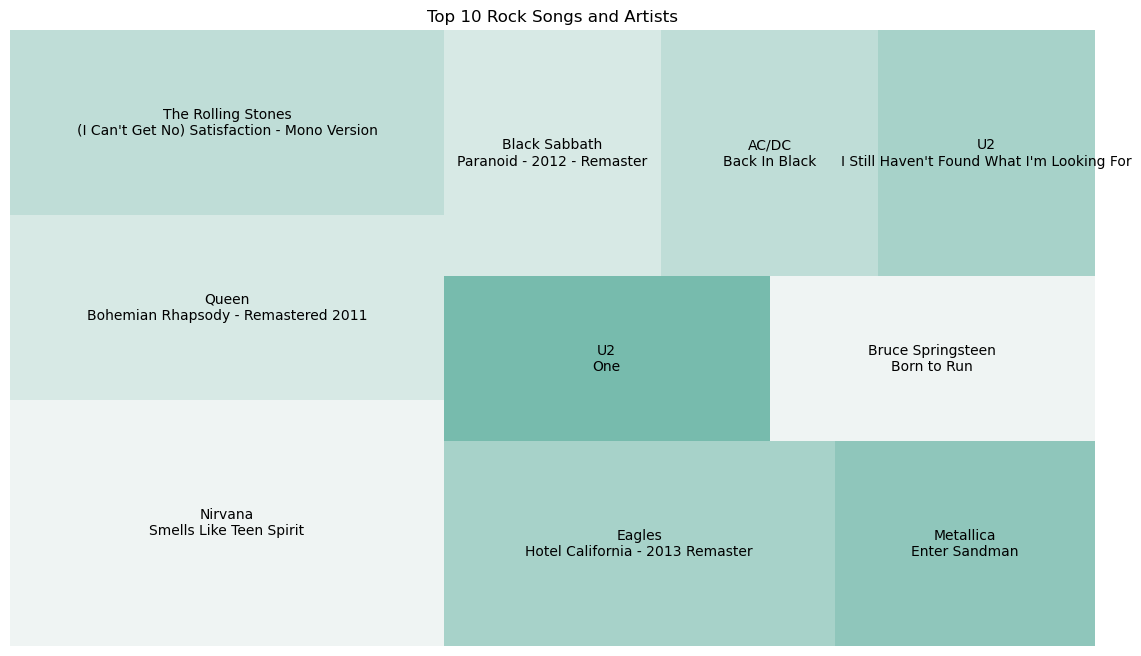

In [18]:
plt.figure(figsize=(14,8))
labels = ["%s\n%s" % (label) for label in zip(dataset.artist, dataset.name)]
sq.plot(sizes=dataset.name.value_counts().head(10), label=labels, alpha=.8, color=sns.color_palette("light:#5A9"))
plt.title('Top 10 Rock Songs and Artists')
plt.axis('off')
plt.show()

&nbsp;

Сите нумерички променливи

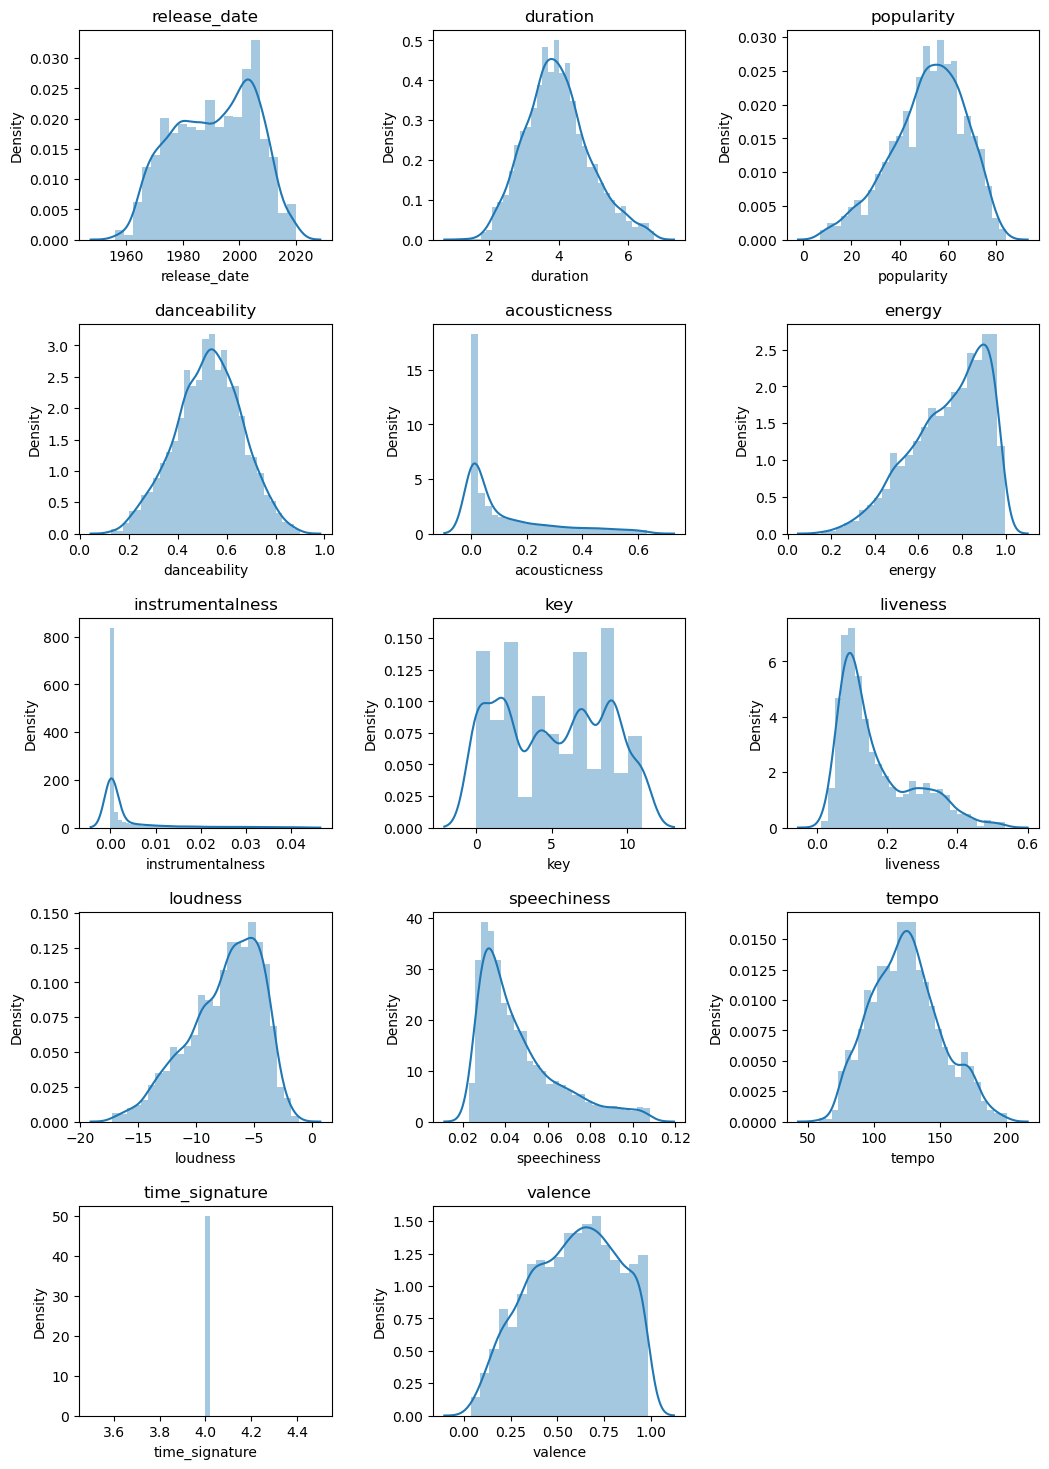

In [19]:
plt.figure(figsize=(12,21))
for i in range(1,len(numerical_features)+1):
    ax=plt.subplot(6, 3, i)
    sns.distplot(dataset[numerical_features[i-1]])
    ax.set_title(numerical_features[i-1])
    
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

&nbsp;

&nbsp;

Пирсонов коефициент на корелација

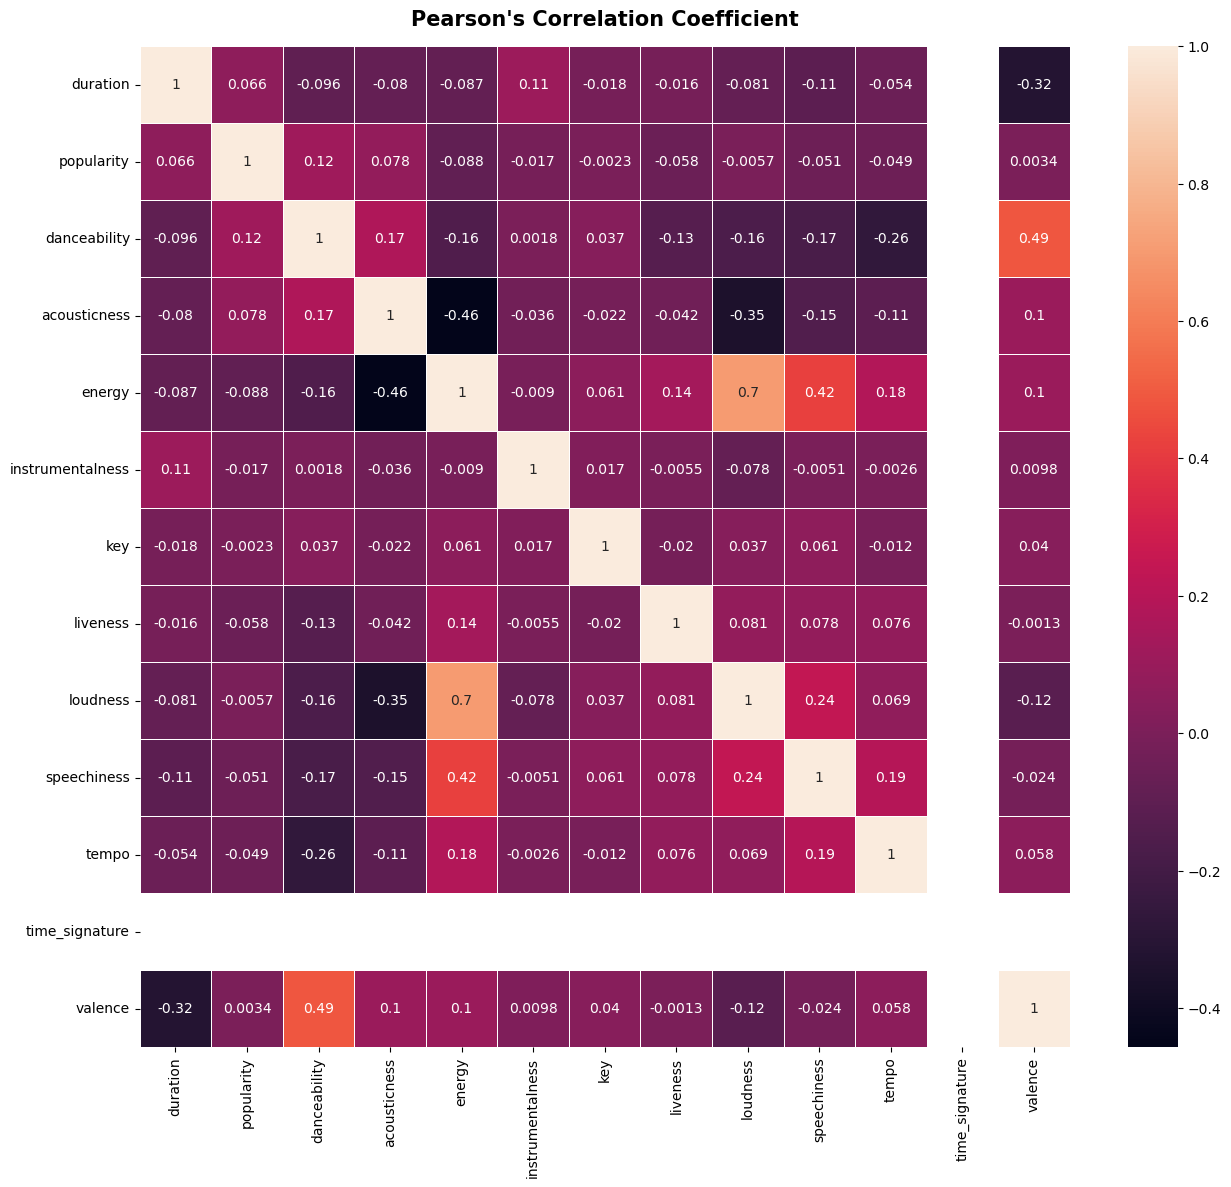

In [20]:
fig = plt.figure(figsize=(15,13))
sns.heatmap(dataset[dataset.columns.drop(['release_date', 'hit'])].corr(), annot=True, linewidth = .5)
plt.title('Pearson\'s Correlation Coefficient', fontsize=15, fontweight='bold', pad='15.0')
plt.show()

Приметуваме **силна корелација** помеѓу променливите **energy** и **loudness**

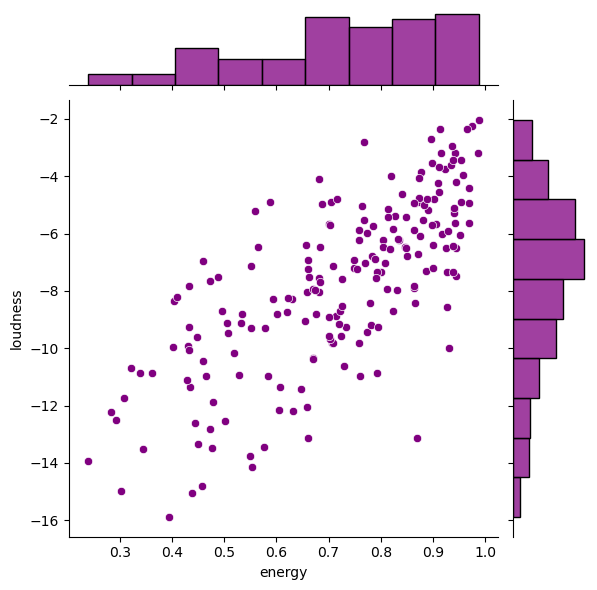

In [21]:
sns.jointplot(x='energy', y='loudness', data=dataset.head(200), kind='scatter', color='purple')
plt.show()

&nbsp;

Спирманов коефициент на корелација

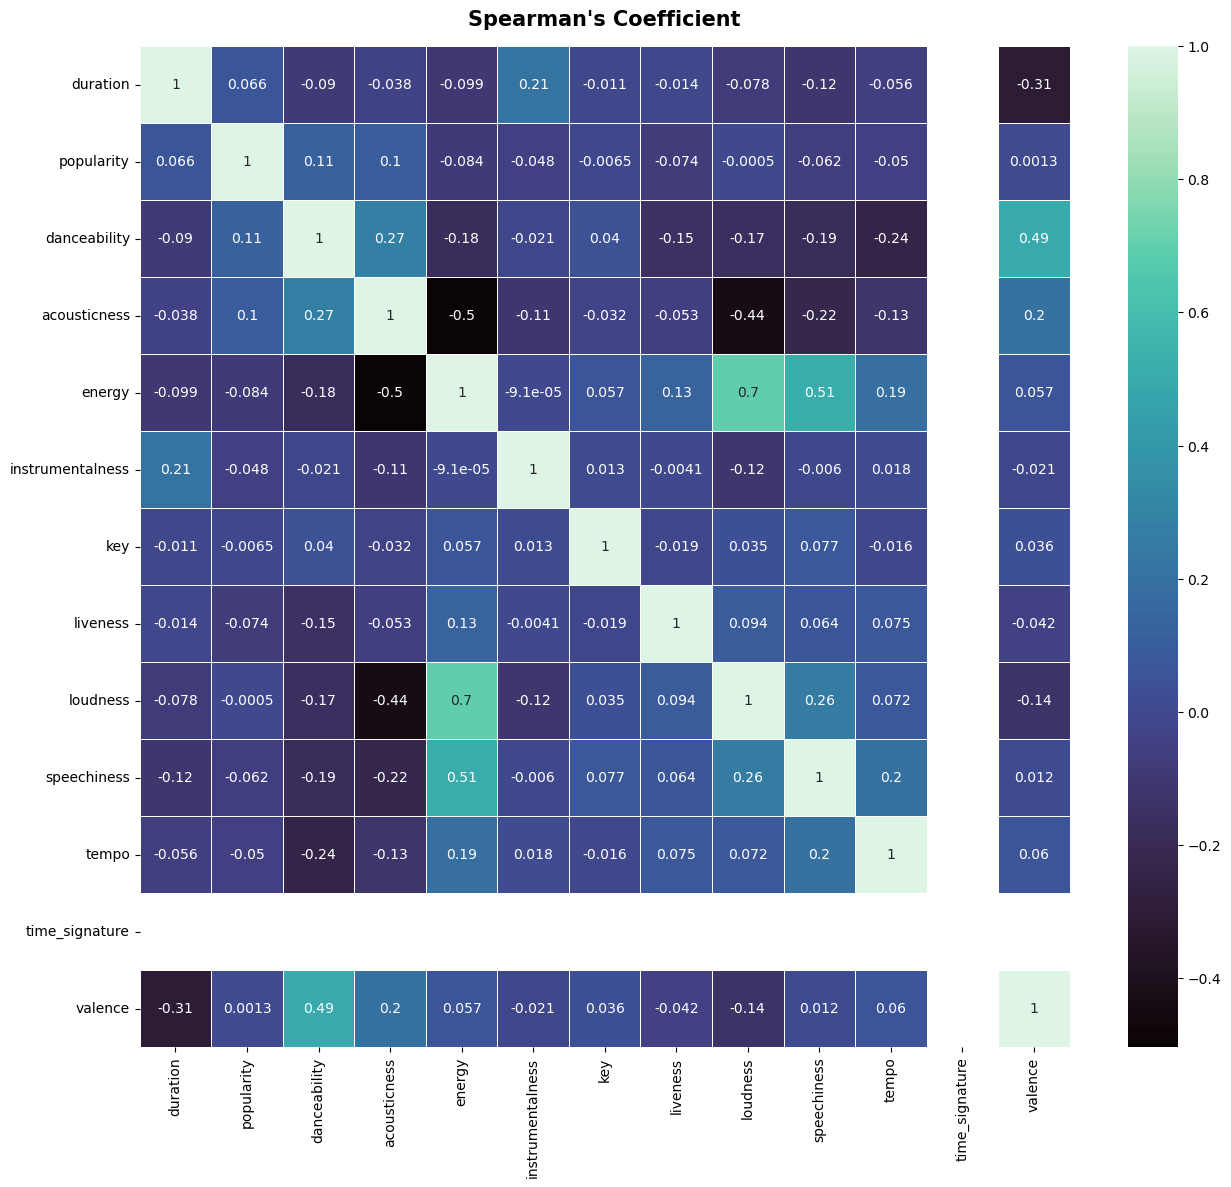

In [22]:
fig = plt.figure(figsize=(15,13))
sns.heatmap(dataset[dataset.columns.drop(['release_date', 'hit'])].corr(method="spearman"), annot=True, cmap='mako', linewidth = .5)
plt.title('Spearman\'s Coefficient', fontsize=15, fontweight='bold', pad='15.0')
plt.show()

Приметуваме **силна монотона врска** помеѓу променливите **energy** и **loudness**

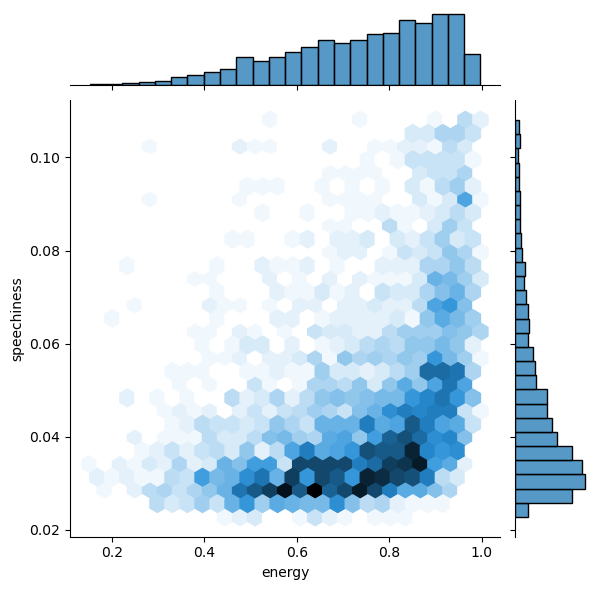

In [23]:
sns.jointplot(x='energy', y='speechiness', data=dataset, kind='hex')
plt.show()

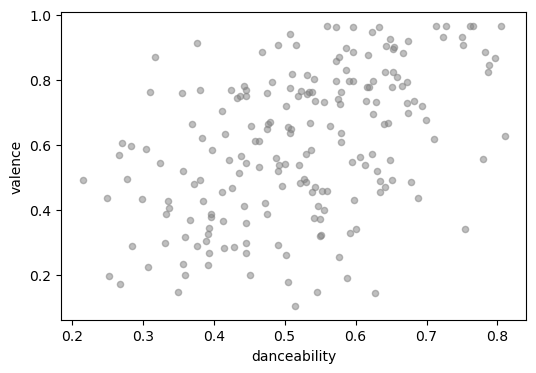

In [24]:
fig, ax = plt.subplots(1,1,figsize=(6, 4))
dataset.head(200).plot.scatter('danceability', 'valence', color='gray', alpha=0.5, ax=ax)
plt.show()

Линеарни регресии

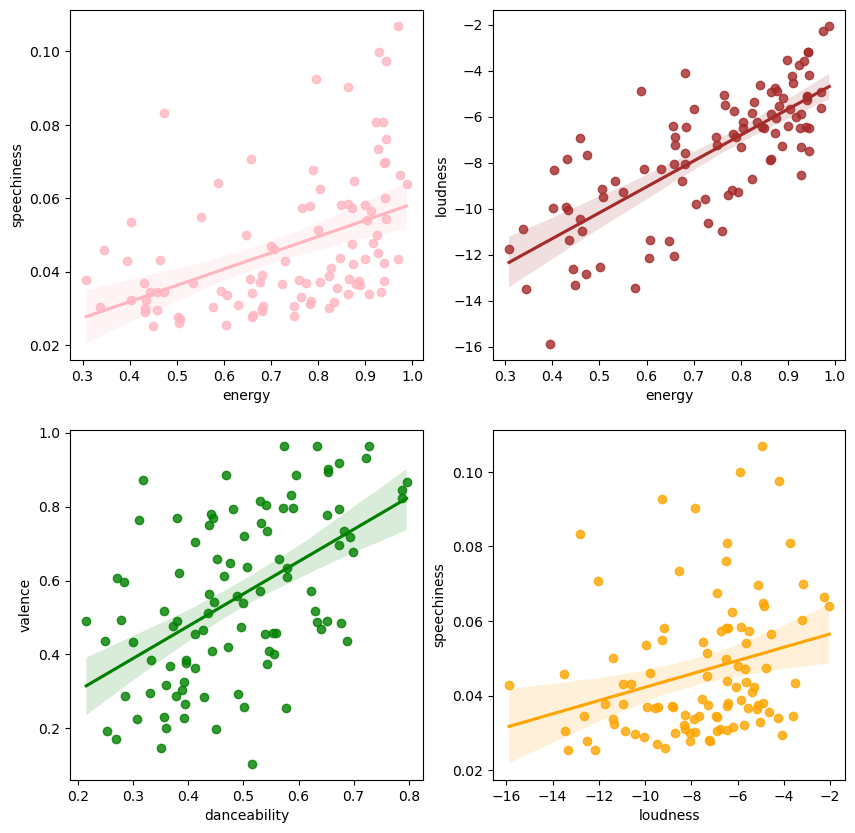

In [25]:
fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
sns.regplot(x='energy',y='loudness', ax=axs[0,1], data=dataset.head(100), color='brown')
sns.regplot(x='energy',y='speechiness', ax=axs[0,0], data=dataset.head(100), color='lightpink')
sns.regplot(x='danceability',y='valence', ax=axs[1,0], data=dataset.head(100), color='green')
sns.regplot(x='loudness',y='speechiness', ax=axs[1,1], data=dataset.head(100), color='orange')
plt.show()

&nbsp;

## Скалирање и енкодирање

In [26]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [27]:
dataset_copy = dataset.copy()

In [28]:
dataset_copy['artist'] = encoder.fit_transform(dataset_copy['artist'])

In [29]:
dataset_copy = dataset_copy.set_index('name')

In [30]:
dataset_copy.head(5)

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,658,1991.0,5.03,74.0,0.502,0.000025,0.912,0.000173,1.0,0.1060,-4.556,0.0564,116.761,4.0,0.720,1
Bohemian Rhapsody - Remastered 2011,736,1975.0,5.91,74.0,0.392,0.288000,0.402,0.000000,0.0,0.2430,-9.961,0.0536,143.883,4.0,0.228,1
(I Can't Get No) Satisfaction - Mono Version,1067,1965.0,3.71,77.0,0.723,0.038300,0.863,0.031700,2.0,0.1280,-7.890,0.0338,136.302,4.0,0.931,1
Hotel California - 2013 Remaster,291,1976.0,6.52,83.0,0.579,0.005740,0.508,0.000494,2.0,0.0575,-9.484,0.0270,147.125,4.0,0.609,1
Enter Sandman,603,1991.0,5.53,74.0,0.579,0.002060,0.824,0.009030,6.0,0.0590,-8.710,0.0300,123.331,4.0,0.635,1


In [31]:
columns = dataset_copy.columns
columns

Index(['artist', 'release_date', 'duration', 'popularity', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'speechiness', 'tempo', 'time_signature', 'valence', 'hit'],
      dtype='object')

In [32]:
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_copy[dataset_copy.columns.drop(['artist', 'release_date', 'hit'])]), 
                           columns=columns.drop(['artist', 'release_date', 'hit']))

In [33]:
dataset_scaled.head()

,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.686131,0.870130,0.484496,0.000036,0.899408,0.004109,0.090909,0.179732,0.788586,0.394366,0.409972,0.0,0.721695
1,0.846715,0.870130,0.342377,0.454974,0.295858,0.000000,0.000000,0.441683,0.452203,0.361502,0.601436,0.0,0.203036
2,0.445255,0.909091,0.770026,0.060502,0.841420,0.752969,0.181818,0.221797,0.581093,0.129108,0.547919,0.0,0.944128
3,0.958029,0.987013,0.583979,0.009064,0.421302,0.011734,0.181818,0.086998,0.481889,0.049296,0.624322,0.0,0.604681
4,0.777372,0.870130,0.583979,0.003250,0.795266,0.214489,0.545455,0.089866,0.530060,0.084507,0.456352,0.0,0.632089


&nbsp;

## Намалување на димензионалноста

In [34]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(dataset_scaled)

In [35]:
pca_features

array([[-0.08289242, -0.41489648],
       [ 0.47957674, -0.3900466 ],
       [ 0.15155485, -0.14310683],
       ...,
       [-0.21691521, -0.42482494],
       [-0.63559252, -0.03593852],
       [-0.52640915, -0.64476702]])

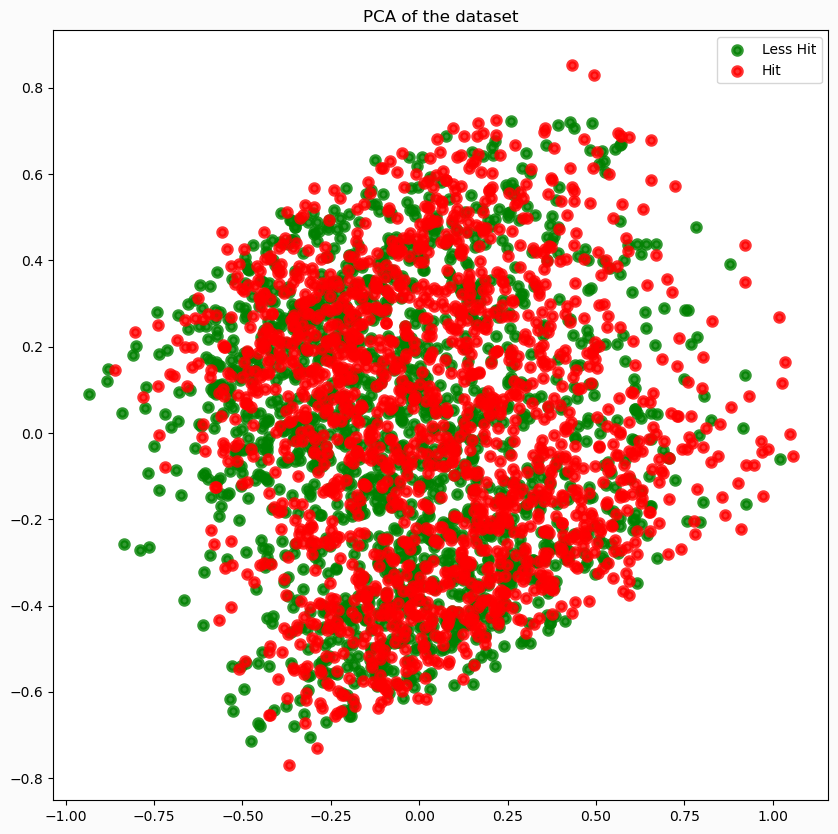

In [36]:
colors = ['green', 'red']
fig = plt.figure(figsize=(10, 10), facecolor="#fbfbfb")

for i, color in enumerate(zip(colors)):
    plt.scatter(pca_features[dataset['hit'] == i, 0], pca_features[dataset['hit'] == i, 1], color=color, alpha=.8, lw=3,
                label='Hit' if i==1 else 'Less Hit')
plt.legend(loc='best', shadow=False)
plt.title('PCA of the dataset')
plt.show()